In [18]:
import os
import subprocess
import sqlite3 as sql

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters
from MopsResults import MopsResults

% matplotlib inline

In [2]:
# Location containing detection data
# Columns: diaId visitId objectId ra dec mjd mag snr
dataLocation = "/Users/joachim/repos/neosim/unittest/testData/full/full.txt"
# Path to run location
runLocation = "/Users/joachim/repos/neosim/example/"
mopsOutputLocation =  runLocation + "run/"

In [3]:
dets_df = MopsReader.readDetectionsIntoDataframe(dataLocation)
dets_df

,visitId,objectId,ra,dec,mjd,mag,snr
diaId,,,,,,,
0,0,1,220.643549,-21.965527,59580.16,15.181889,5.0
1,1,1,220.659667,-21.970416,59580.20,15.181976,5.0
2,2,1,221.042042,-22.085481,59581.16,15.184020,5.0
3,3,1,221.058056,-22.090310,59581.20,15.184099,5.0
4,4,1,221.437935,-22.203902,59582.16,15.185958,5.0
5,5,1,221.453842,-22.208670,59582.20,15.186030,5.0
6,6,1,221.831176,-22.320788,59583.16,15.187702,5.0
7,7,1,221.846974,-22.325496,59583.20,15.187766,5.0
8,8,1,222.221714,-22.436138,59584.16,15.189252,5.0


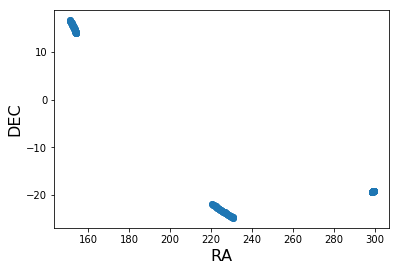

In [4]:
MopsPlotter.plotDataframe(dets_df)

In [5]:
nightly = runLocation + "nightly/"

import os
os.makedirs(nightly)

In [6]:
call = ["python", os.getenv("MOPS_DIR") + "/bin/splitByNight.py", "-n", nightly, dataLocation]
subprocess.call(call);

In [7]:
### Check nightly has been populated with files
os.listdir(nightly)[:5]

['59580.dias', '59581.dias', '59582.dias', '59583.dias', '59584.dias']

In [8]:
parameters = MopsParameters(velocity_max="10.0", ra_acceleration_max="5.0", dec_acceleration_max="5.0", detection_error_threshold="0.0034")
tracker = MopsTracker(mopsOutputLocation)
tracker.getDetections(nightly)

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         10.0
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets (tracklets) ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	Detection error threshold:                0.0034
	Maximum right ascension acceleration:     5.0
	Maximum declination acceleration: 

In [9]:
parameters, tracker = runMops.runMops(parameters, tracker, overwrite=True)

------- Run MOPS -------
Running LSST's Moving Object Pipeline

Overwrite triggered: clearing tracker...

Found 30 detection files in /Users/joachim/repos/neosim/example/nightly/.

Saving parameters to /Users/joachim/repos/neosim/example/run/parameters.yaml

------- Run MOPS -------
Running findTracklets...
Completed running findTracklets.

Saving tracker to /Users/joachim/repos/neosim/example/run/tracker.yaml

------- Run MOPS -------
Running idsToIndices.py...
Completed running idsToIndices.py.

Saving tracker to /Users/joachim/repos/neosim/example/run/tracker.yaml

------- Run MOPS -------
Running collapseTracklets...
Completed running collapseTracklets.

------- Run MOPS -------
Running indicesToIds.py...
Completed running indicesToIds.py.

Saving tracker to /Users/joachim/repos/neosim/example/run/tracker.yaml

------- Run MOPS -------
Running purifyTracklets...
Completed running purifyTracklets.

------- Run MOPS -------
Running indicesToIds.py...
Completed running indicesToIds.py

In [11]:
parameters = MopsParameters.fromYaml(mopsOutputLocation + "parameters.yaml")
tracker = MopsTracker.fromYaml(mopsOutputLocation + "tracker.yaml")

Loading parameters from /Users/joachim/repos/neosim/example/run/parameters.yaml
Loading tracker from /Users/joachim/repos/neosim/example/run/tracker.yaml


In [12]:
results, df = MopsAnalysis.analyze(parameters, tracker, fullDetFile=dataLocation, overwrite=True)

Initializing new results object...
Creating DiaSources table...
Creating AllObjects table...
Creating FoundObjects view...
Creating MissedObjects view...
Creating AllTracklets table...
Creating TrackletMembers table...
Creating Tracklets view...
Creating CollapsedTracklets view...
Creating PurifiedTracklets view...
Creating FinalTracklets view...

Reading full detections file into dataframe...
Counting findable objects as tracklets...
Counting findable objects as tracks...
Building objects dataframe...
Updating objects dataframe...
Reading full detections file into database...

Starting tracklet analysis for 30 nights...

Starting tracklet analysis for night 59580 at Wed Mar 29 09:00:08 2017

- Writing results to /Users/joachim/repos/neosim/example/run/results/59580.results
- Checking file sizes...
- Reading input detections...
- Counting findable objects...
- Updating results object...
Saving results to /Users/joachim/repos/neosim/example/run/results/results.yaml
- Writing detection f

In [14]:
results = MopsResults.fromYaml(mopsOutputLocation + "results.yaml")

Loading results from /Users/joachim/repos/neosim/example/run/results.yaml


In [19]:
import MopsDatabase
import MopsPlotter

In [20]:
con = sql.connect(tracker.mainDatabase)
window_dbs = MopsDatabase.attachDatabases(con, tracker.windowDatabases)

Proceeding with the first 10 databases...
Attaching /Users/joachim/repos/neosim/example/run/results/59580-59595.db to con as db0...
Attaching /Users/joachim/repos/neosim/example/run/results/59581-59596.db to con as db1...
Attaching /Users/joachim/repos/neosim/example/run/results/59582-59597.db to con as db2...
Attaching /Users/joachim/repos/neosim/example/run/results/59583-59598.db to con as db3...
Attaching /Users/joachim/repos/neosim/example/run/results/59584-59599.db to con as db4...
Attaching /Users/joachim/repos/neosim/example/run/results/59585-59600.db to con as db5...
Attaching /Users/joachim/repos/neosim/example/run/results/59586-59601.db to con as db6...
Attaching /Users/joachim/repos/neosim/example/run/results/59587-59602.db to con as db7...
Attaching /Users/joachim/repos/neosim/example/run/results/59588-59603.db to con as db8...
Attaching /Users/joachim/repos/neosim/example/run/results/59589-59604.db to con as db9...


In [21]:
results.performanceRatio

{'59580-59595': 1.0,
 '59581-59596': 1.0,
 '59582-59597': 1.0,
 '59583-59598': 1.0,
 '59584-59599': 1.0,
 '59585-59600': 1.0,
 '59586-59601': 1.0,
 '59587-59602': 1.0,
 '59588-59603': 1.0,
 '59589-59604': 1.0,
 '59590-59605': 1.0,
 '59591-59606': 1.0,
 '59592-59607': 1.0,
 '59593-59608': 1.0,
 '59594-59609': 0.6666666666666666,
 '59595-59609': 0.6666666666666666,
 '59596-59609': 0.6666666666666666,
 '59597-59609': 0.6666666666666666,
 '59598-59609': 0.6666666666666666,
 '59599-59609': 0.6666666666666666,
 '59600-59609': 0.6666666666666666,
 '59601-59609': 0.6666666666666666,
 '59602-59609': 0.6666666666666666,
 '59603-59609': 0.6666666666666666,
 '59604-59609': 0.6666666666666666,
 '59605-59609': 0.6666666666666666,
 '59606-59609': 0.6666666666666666,
 '59607-59609': 0.6666666666666666}

ValueError: First argument must be a sequence

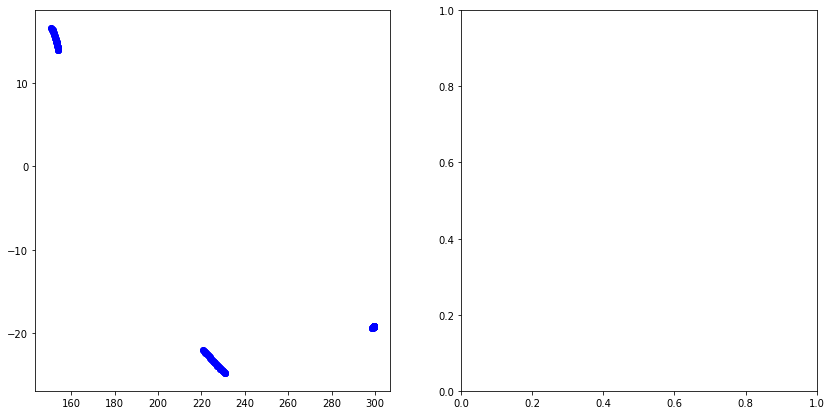

In [22]:
MopsPlotter.plotHists(con)

In [23]:
MopsDatabase.results(con)

Completeness:                  1.0
Findable Objects:              3
Found Objects:                 3
Missed Objects:                0

findTracklets Efficiency:      1.0
True Tracklets:                90
False Tracklets:               0
Total Tracklets:               90

collapsedTracklets Efficiency: 0.0
True Collapsed Tracklets:      0
False Collapsed Tracklets:     0
Total Collapsed Tracklets:     0

purifyTracklets Efficiency:    0.0
True Purified Tracklets:       0
False Purified Tracklets:      0
Total Purified Tracklets:      0

linkTracklets Efficiency:      1.0
True Tracks:                   4180
False Tracks:                  0
Total Tracks:                  4180
